<a href="https://colab.research.google.com/github/dinhquy-nguyen-1704/Mini_projects/blob/main/Decision_Tree_and_Its_Variances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/CODE/Bài tập AIO"

/content/drive/MyDrive/CODE/Bài tập AIO


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv("cleveland.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [5]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']

df['target'] = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


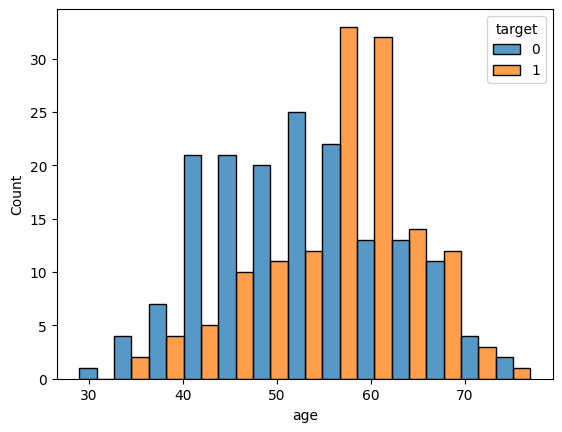

In [8]:
sns.histplot(data=df, x='age', hue='target', multiple="dodge")
plt.show()

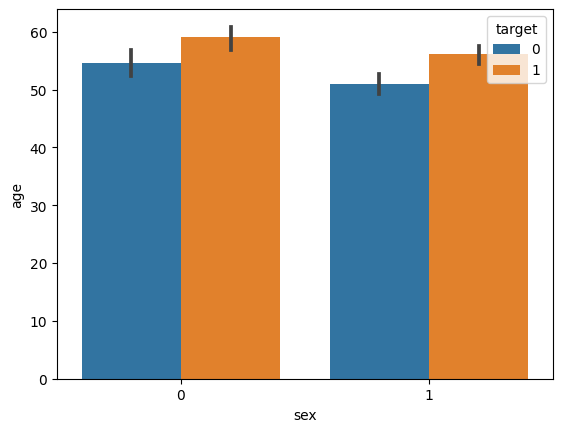

In [9]:
sns.barplot(data=df, x='sex', y='age', hue='target')
plt.show()

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##KNeighborsClassifier

In [19]:
clf_1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
clf_1.fit(X_train, y_train)
y_train_pred = clf_1.predict(X_train)
y_test_pred = clf_1.predict(X_test)

In [20]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.756198347107438
accuracy_score for test: 0.6885245901639344


##SVM

In [22]:
clf_2 = SVC(kernel='rbf', random_state=42)
clf_2.fit(X_train, y_train)
y_train_pred = clf_2.predict(X_train)
y_test_pred = clf_2.predict(X_test)

In [23]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.6611570247933884
accuracy_score for test: 0.6721311475409836


##Naive Bayes Classifier

In [26]:
clf_3 = GaussianNB()
clf_3.fit(X_train, y_train)
y_train_pred = clf_3.predict(X_train)
y_test_pred = clf_3.predict(X_test)

In [27]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.8471074380165289
accuracy_score for test: 0.8360655737704918


##DecisionTree

In [30]:
clf_4 = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2)
clf_4.fit(X_train, y_train)
y_train_pred = clf_4.predict(X_train)
y_test_pred = clf_4.predict(X_test)

In [31]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 1.0
accuracy_score for test: 0.7540983606557377


##RandomForest

In [34]:
clf_5 = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42)
clf_5.fit(X_train, y_train)
y_train_pred = clf_5.predict(X_train)
y_test_pred = clf_5.predict(X_test)

In [35]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.9834710743801653
accuracy_score for test: 0.8032786885245902


##AdaBoost

In [38]:
clf_6 = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
clf_6.fit(X_train, y_train)
y_train_pred = clf_6.predict(X_train)
y_test_pred = clf_6.predict(X_test)

In [39]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.9132231404958677
accuracy_score for test: 0.8360655737704918


##GradientBoost

In [41]:
clf_7 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,random_state=42)
clf_7.fit(X_train, y_train)
y_train_pred = clf_7.predict(X_train)
y_test_pred = clf_7.predict(X_test)

In [42]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.9958677685950413
accuracy_score for test: 0.8524590163934426


##XGBoost

In [45]:
clf_8 = XGBClassifier(objective="binary:logistic", random_state=42, n_estimators = 100)
clf_8.fit(X_train, y_train)
y_train_pred = clf_8.predict(X_train)
y_test_pred = clf_8.predict(X_test)

In [46]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 1.0
accuracy_score for test: 0.8360655737704918


##Stacking

In [48]:
base_models = [
    ('dtc', DecisionTreeClassifier(random_state=42)),
    ('rfc', RandomForestClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gc', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(kernel='rbf', random_state=42)),
    ('ad', AdaBoostClassifier(random_state=42))
]

# Initialize Stacking Classifier with the Meta Model
clf_9 = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())

In [49]:
clf_9.fit(X_train, y_train)
y_train_pred = clf_9.predict(X_train)
y_test_pred = clf_9.predict(X_test)

In [50]:
print("accuracy_score for train:",accuracy_score(y_train_pred, y_train))
print("accuracy_score for test:",accuracy_score(y_test_pred, y_test))

accuracy_score for train: 0.9214876033057852
accuracy_score for test: 0.9016393442622951
